In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Load Data

In [3]:
df = pd.read_csv('practical_application_II_starter/data/vehicles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [8]:
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


# Clean Data

- Set index to 'id' column
- Drop 'VIN' column as this is just another ID and shouldn't affect price
- Drop NaN values and duplicates
- Use LabelEncoder to convert all values to numerical

In [12]:
df.set_index('id', inplace=True)
df.drop(columns=['VIN'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70379 entries, 7316356412 to 7302301268
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   region        70379 non-null  int64
 1   price         70379 non-null  int64
 2   year          70379 non-null  int64
 3   manufacturer  70379 non-null  int64
 4   model         70379 non-null  int64
 5   condition     70379 non-null  int64
 6   cylinders     70379 non-null  int64
 7   fuel          70379 non-null  int64
 8   odometer      70379 non-null  int64
 9   title_status  70379 non-null  int64
 10  transmission  70379 non-null  int64
 11  drive         70379 non-null  int64
 12  size          70379 non-null  int64
 13  type          70379 non-null  int64
 14  paint_color   70379 non-null  int64
 15  state         70379 non-null  int64
dtypes: int64(16)
memory usage: 9.1 MB


In [16]:
df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,
7316356412,16,1901,92,13,3868,0,5,2,17050,0,0,2,1,10,0,1
7314560853,16,2427,83,13,4232,2,6,0,9872,0,0,0,1,8,1,1
7313406529,16,1769,91,16,6336,0,5,2,11150,0,0,1,1,5,9,1
7312847466,16,2635,80,13,4364,2,6,0,19689,0,1,2,1,10,10,1
7312144944,16,1901,96,10,2241,0,6,2,10208,4,0,2,2,9,5,1


In [92]:
samp_df_for_vis = df.sample(n=100)
samp_df_for_vis.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,
7315980922,350,2840,84,18,4791,0,6,2,534,0,1,2,0,3,10,4
7315937985,18,364,84,20,5001,2,5,2,23924,0,0,1,1,0,9,43
7313915328,17,1816,84,13,4366,0,0,2,20447,0,0,0,1,10,10,10
7316380988,80,218,80,3,1303,2,5,2,25712,0,0,0,1,4,9,5
7315289009,262,740,86,10,3081,0,6,2,18046,0,0,2,1,0,8,4


# Visualize Data

- As a basic visualation, we will plot each column/feature from the sample dataframe individually on the x-axis against the price on the y-axis.

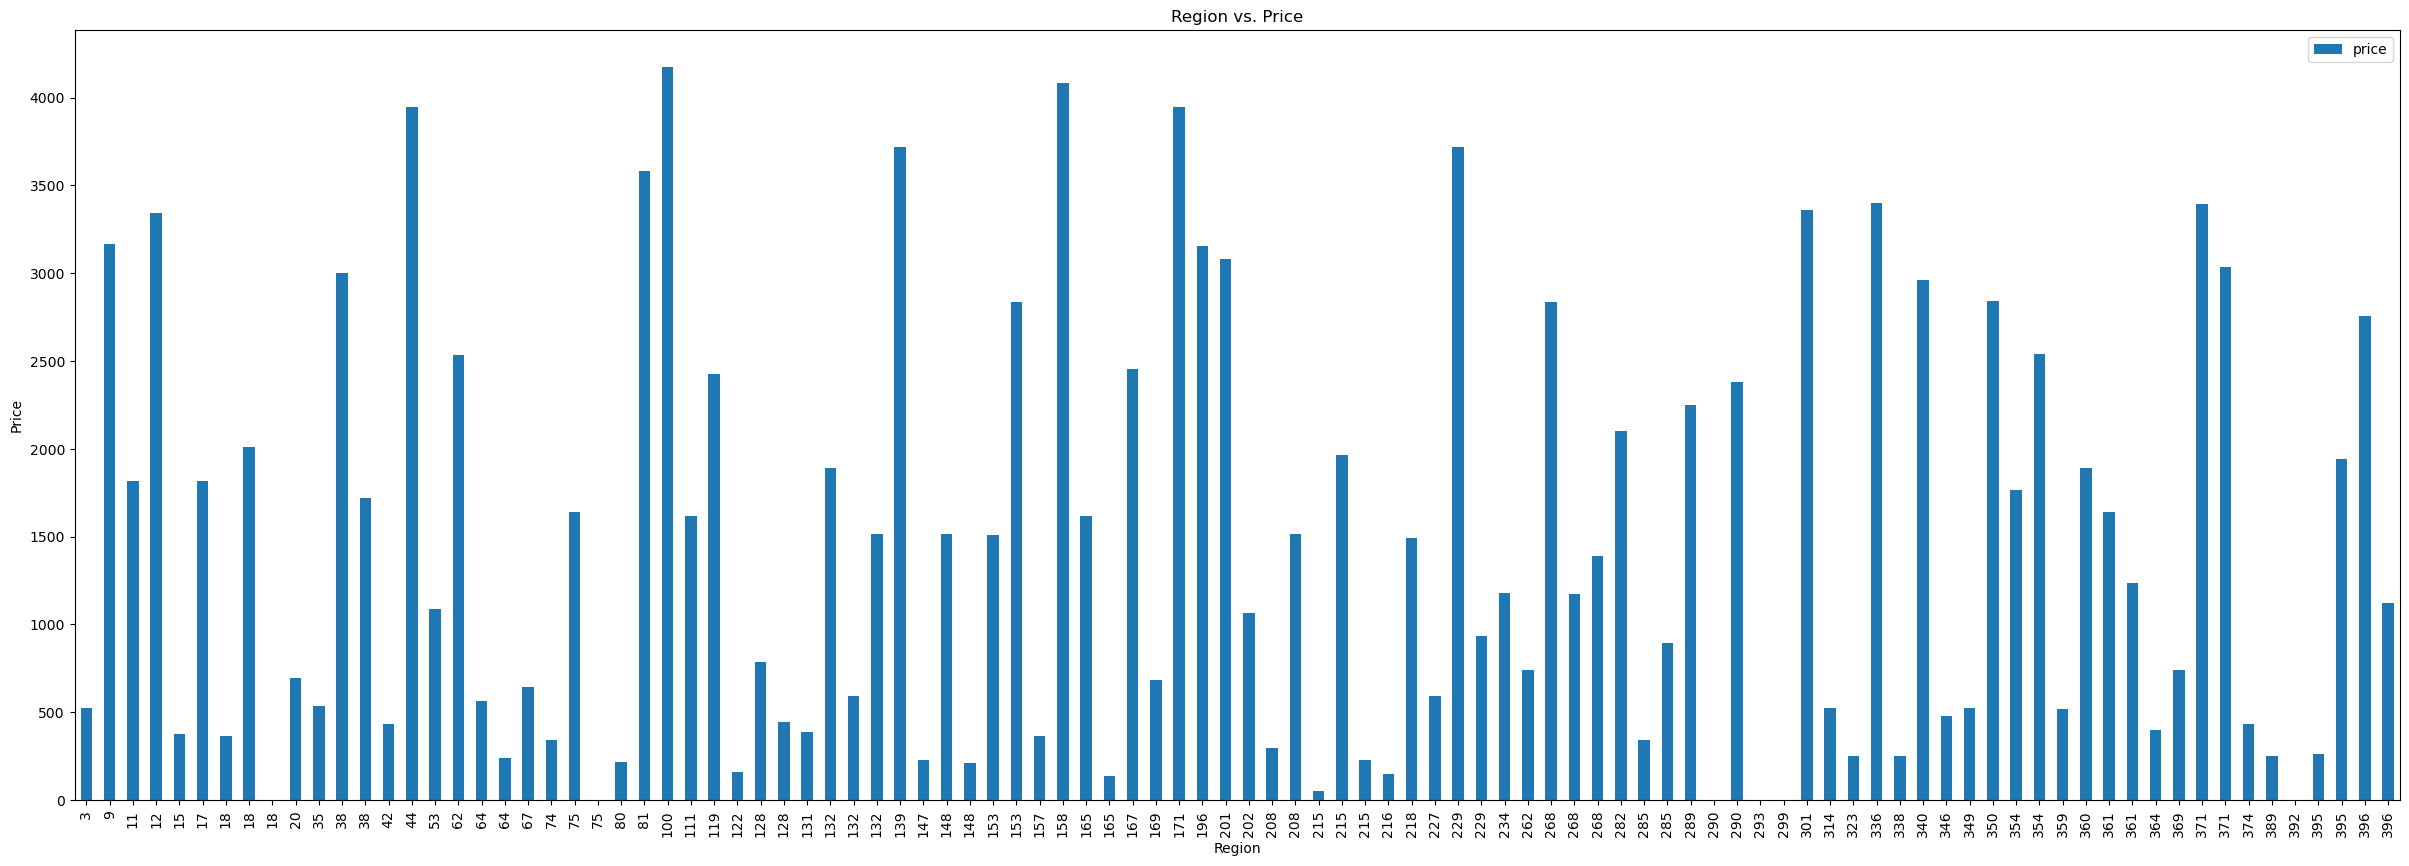

In [145]:
samp_df_for_vis.sort_values(by='region').plot(kind='bar', x='region', y='price', figsize=(30, 10), title='Region vs. Price')
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

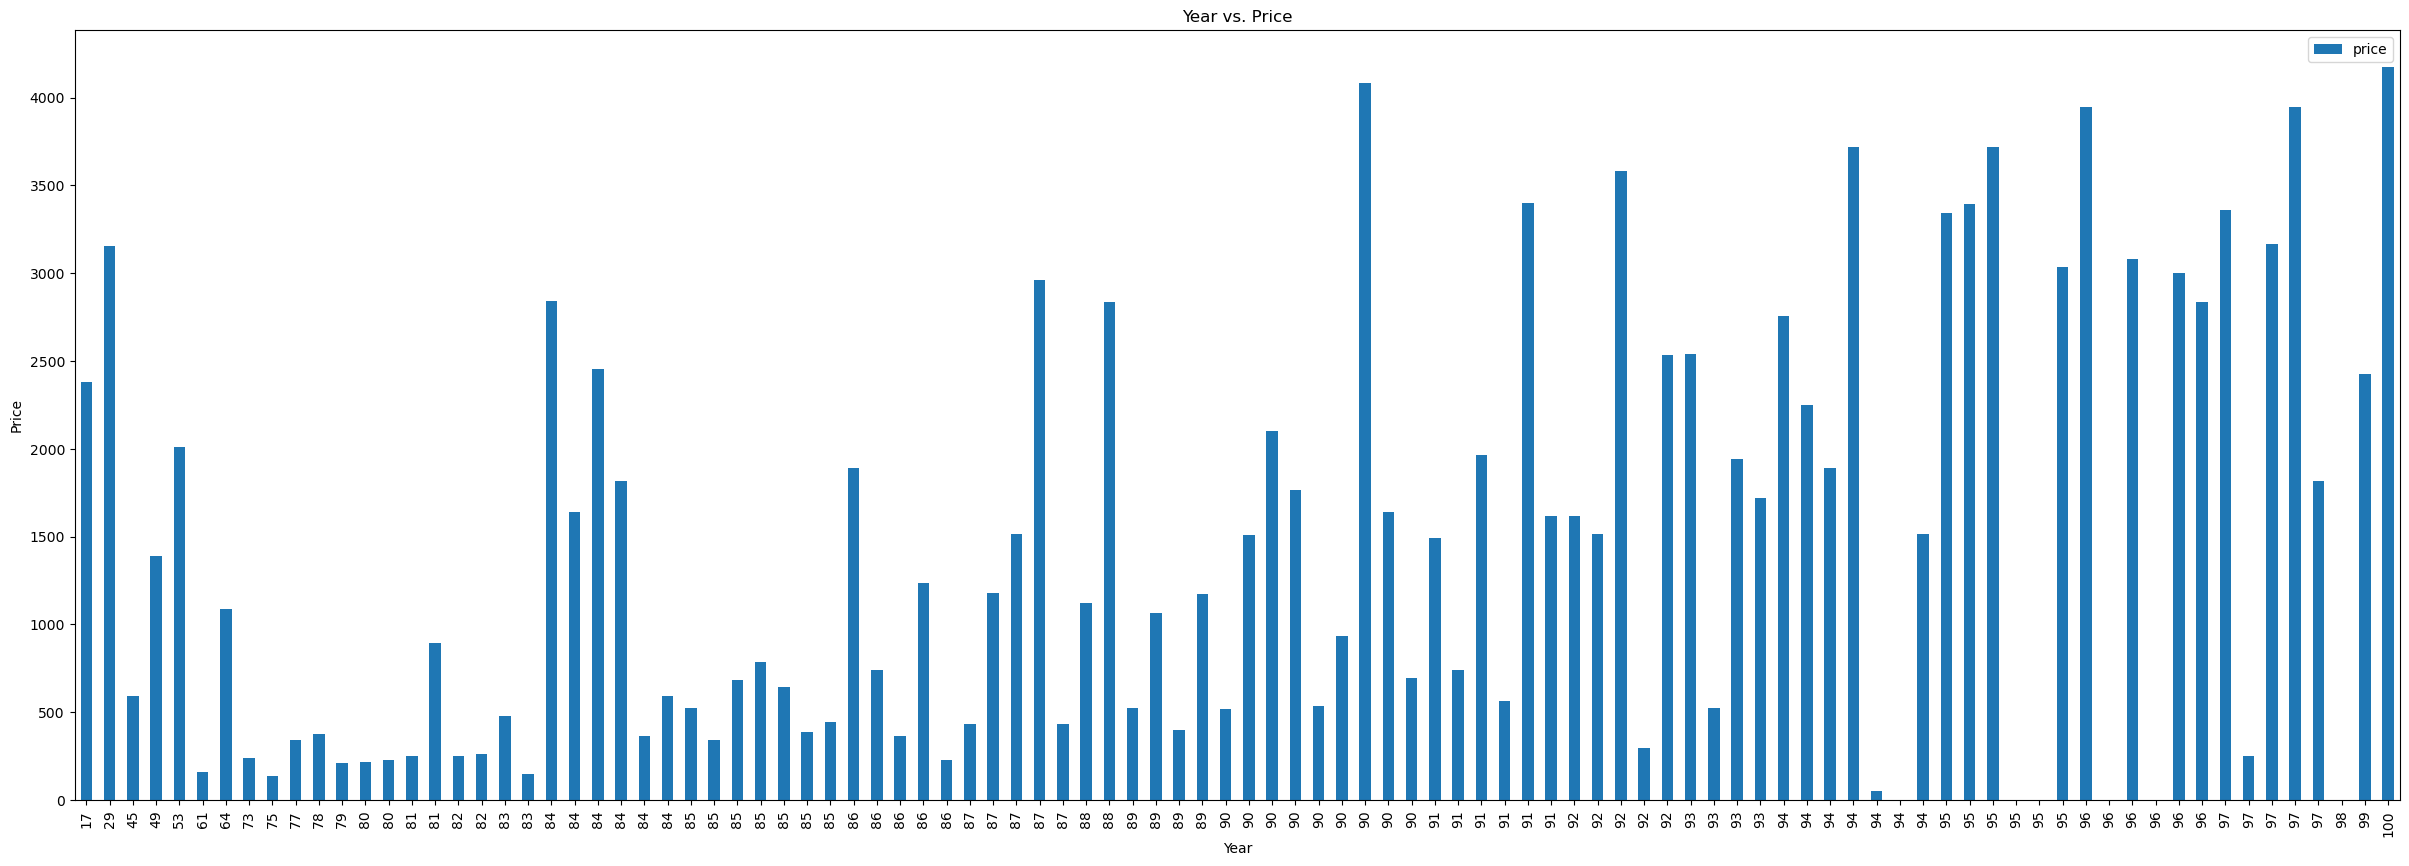

In [149]:
samp_df_for_vis.sort_values(by='year').plot(kind='bar', x='year', y='price', figsize=(30, 10), title='Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

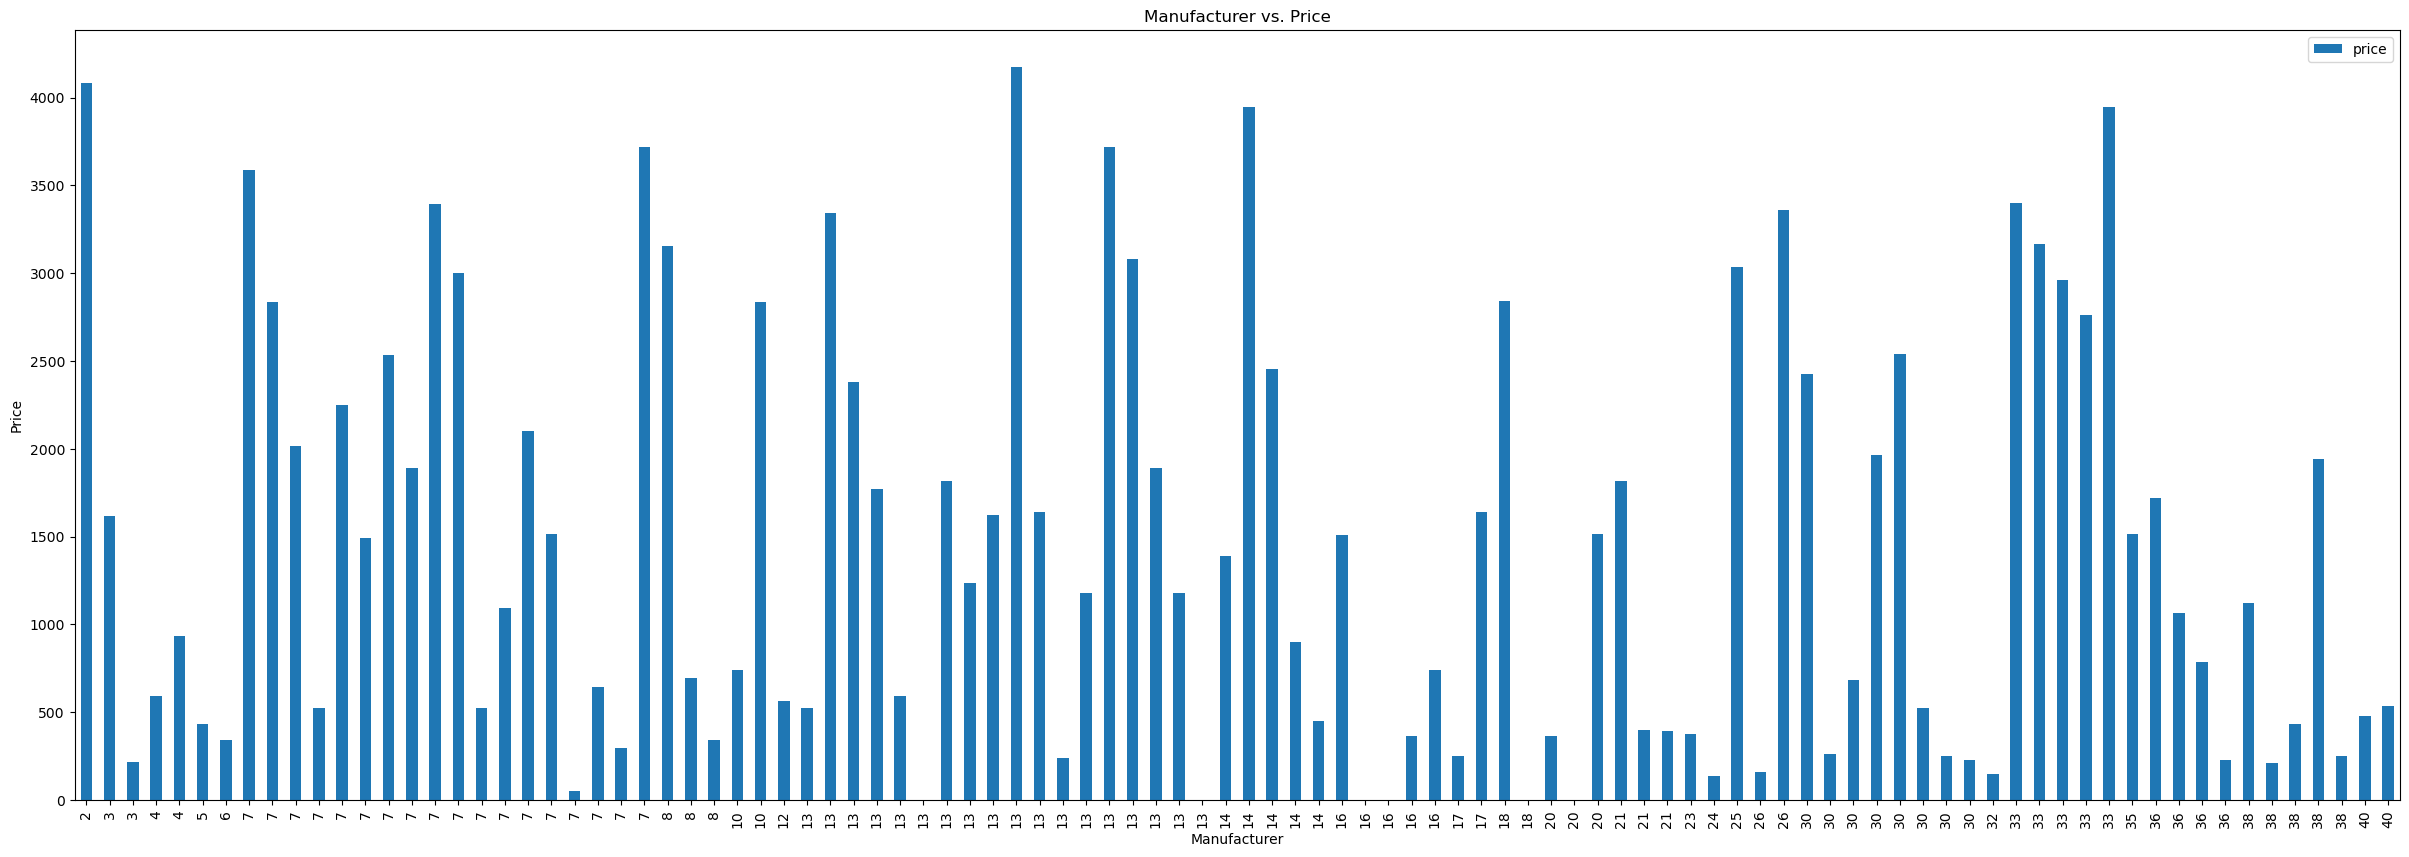

In [151]:
samp_df_for_vis.sort_values(by='manufacturer').plot(kind='bar', x='manufacturer', y='price', figsize=(30, 10), title='Manufacturer vs. Price')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

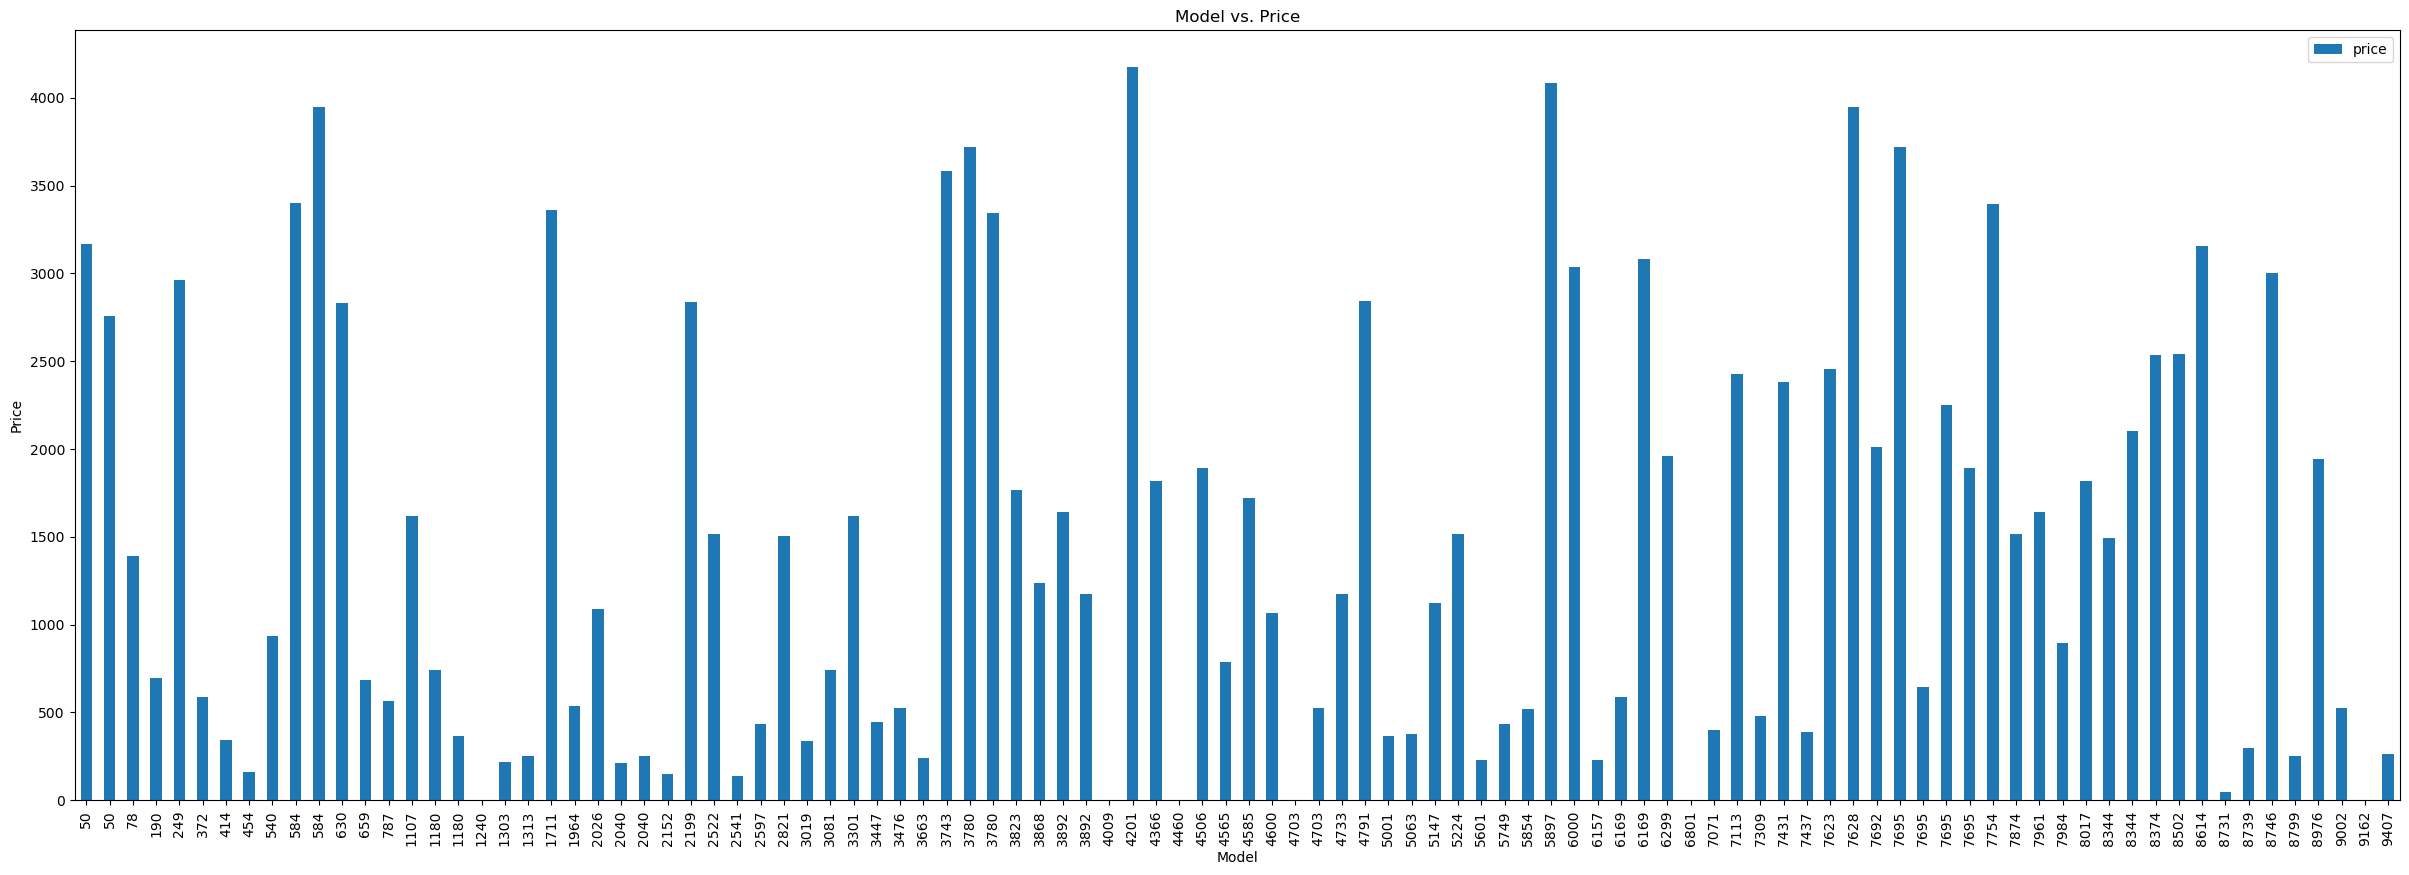

In [153]:
samp_df_for_vis.sort_values(by='model').plot(kind='bar', x='model', y='price', figsize=(30, 10), title='Model vs. Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

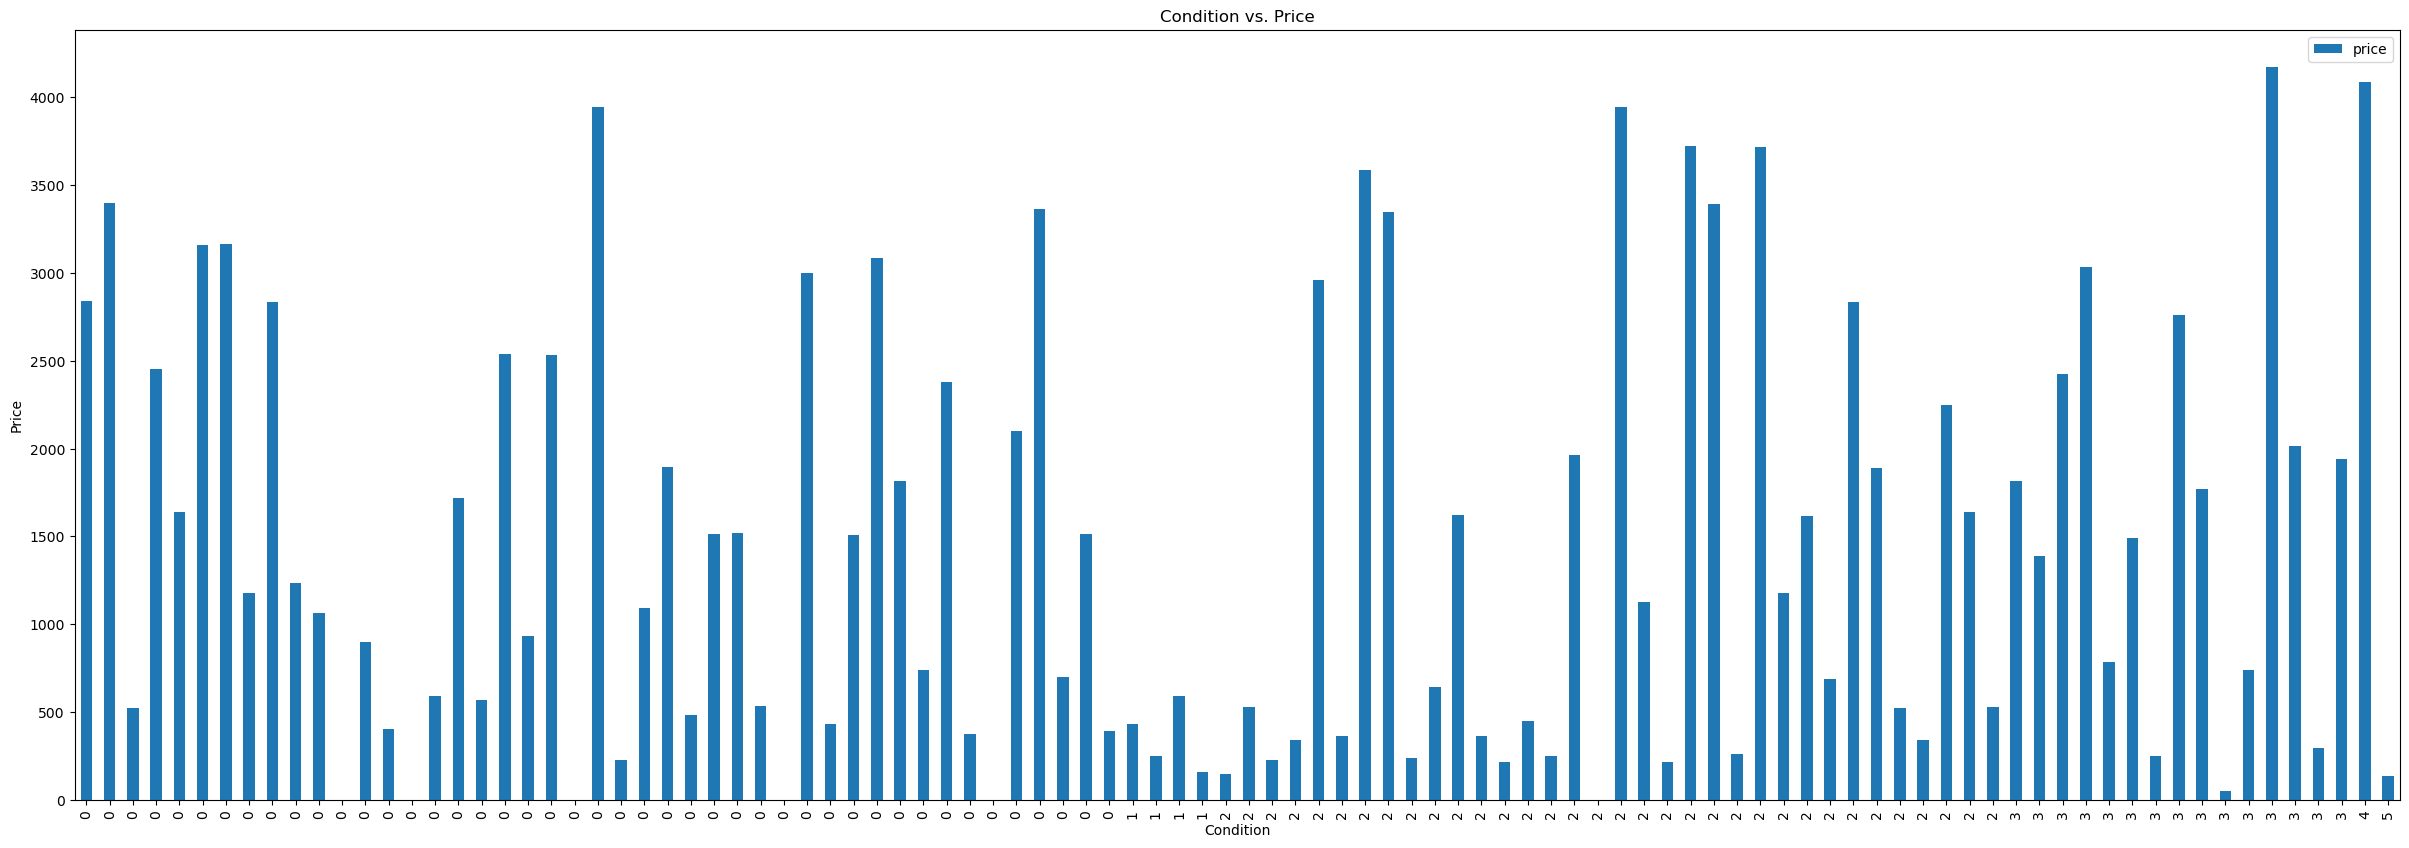

In [155]:
samp_df_for_vis.sort_values(by='condition').plot(kind='bar', x='condition', y='price', figsize=(30, 10), title='Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

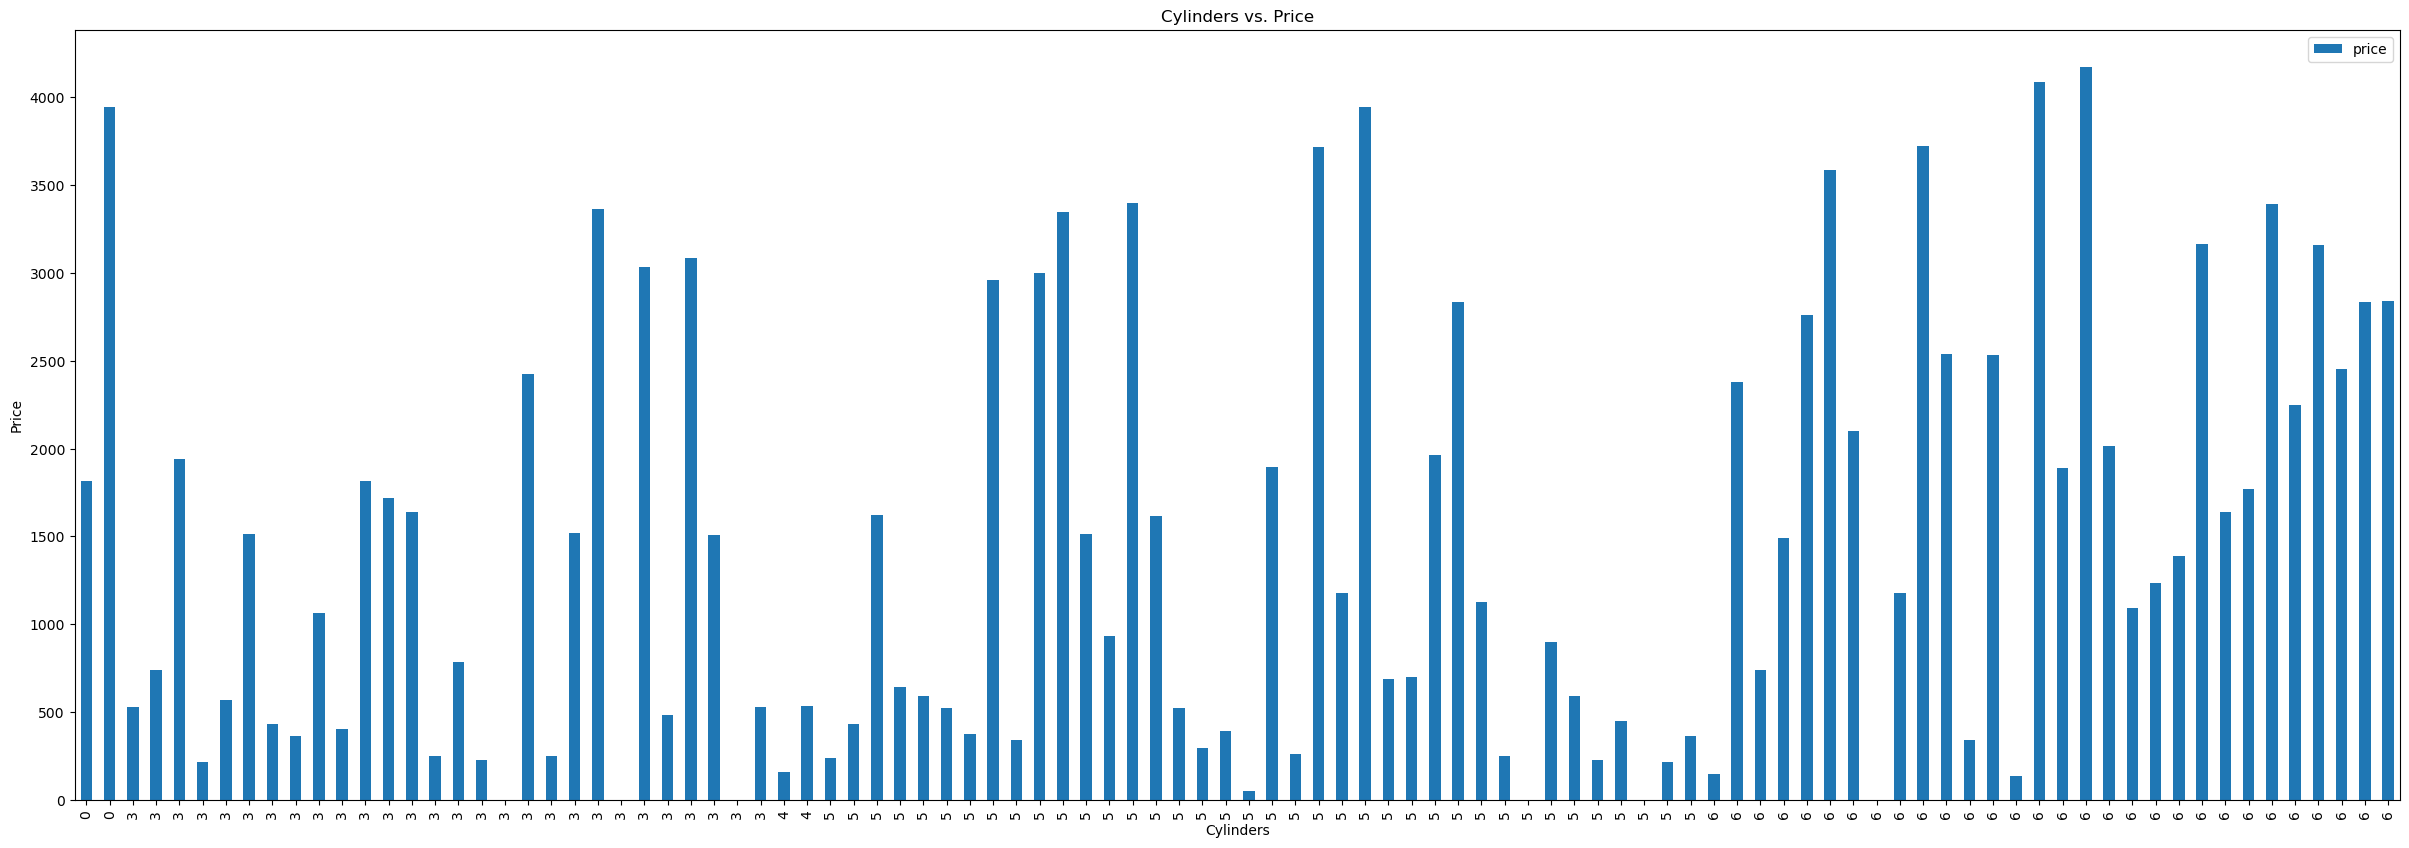

In [157]:
samp_df_for_vis.sort_values(by='cylinders').plot(kind='bar', x='cylinders', y='price', figsize=(30, 10), title='Cylinders vs. Price')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

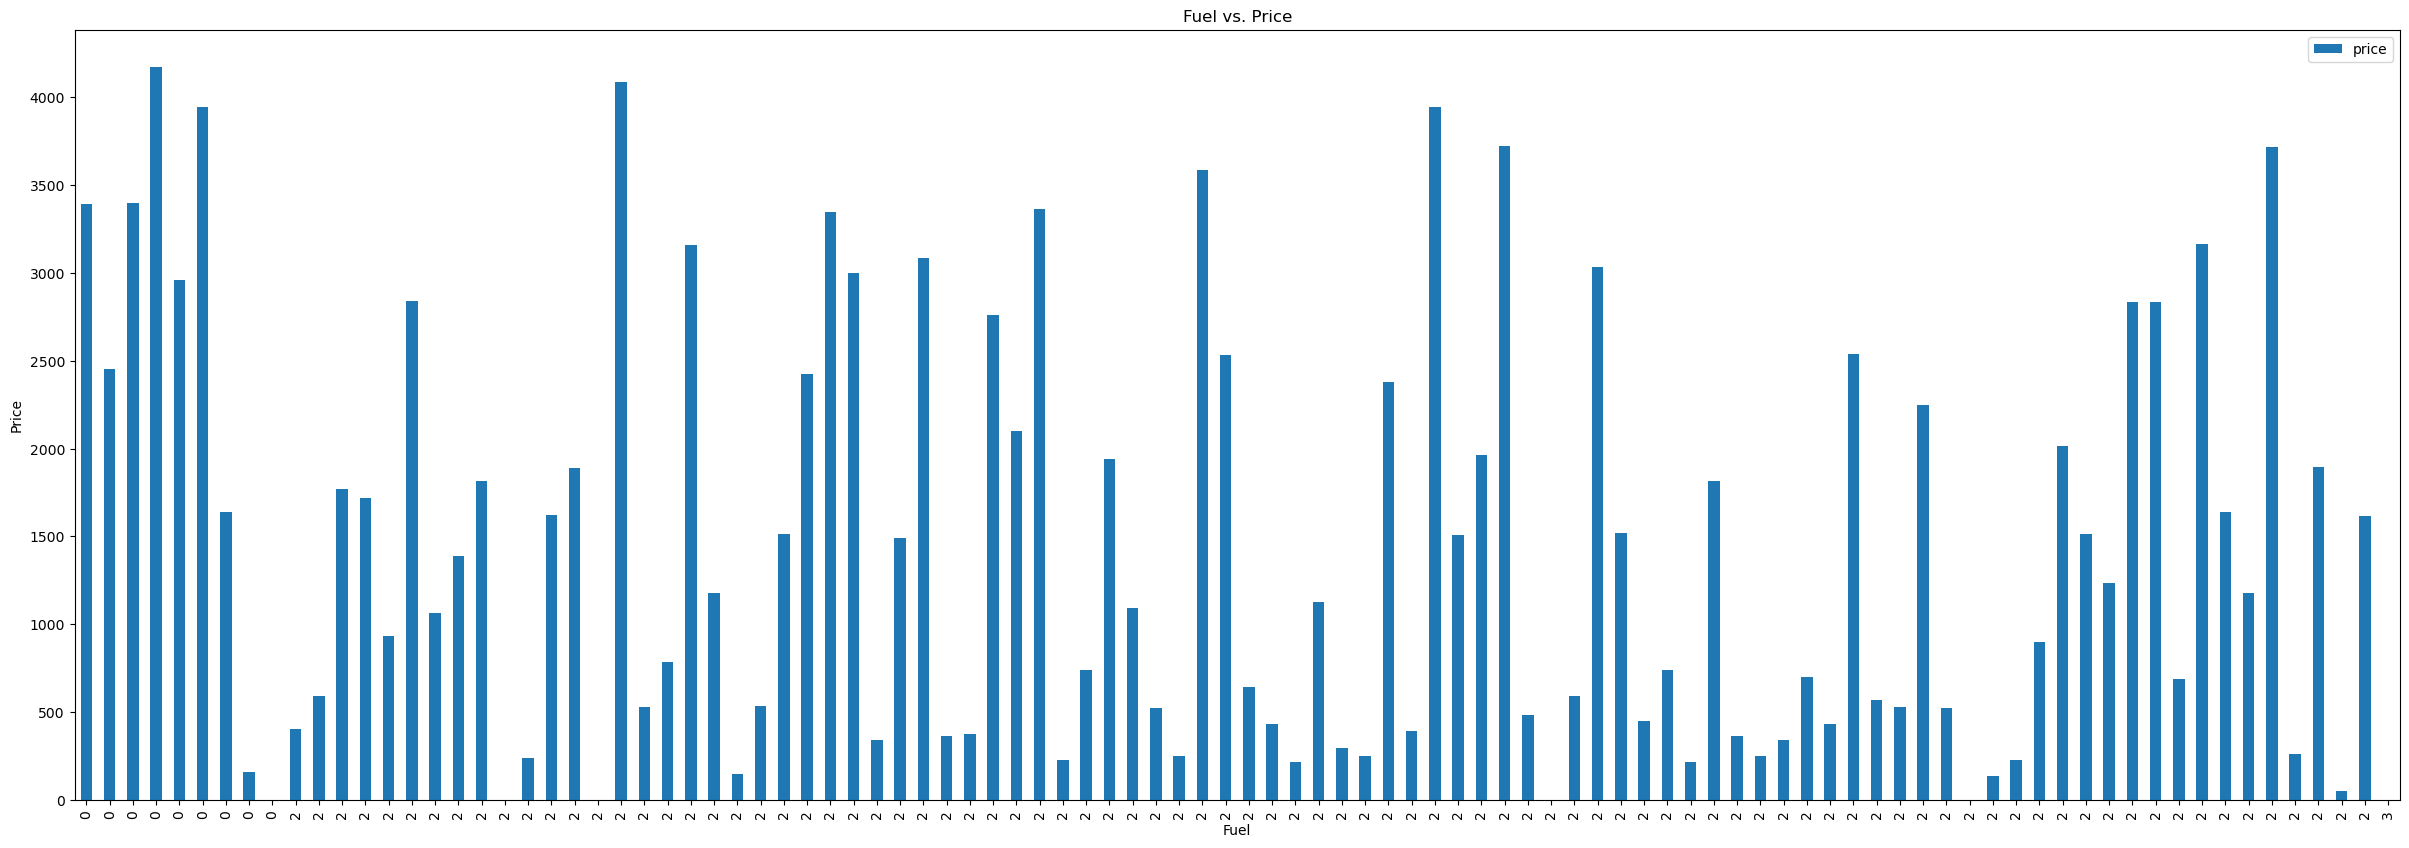

In [159]:
samp_df_for_vis.sort_values(by='fuel').plot(kind='bar', x='fuel', y='price', figsize=(30, 10), title='Fuel vs. Price')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()

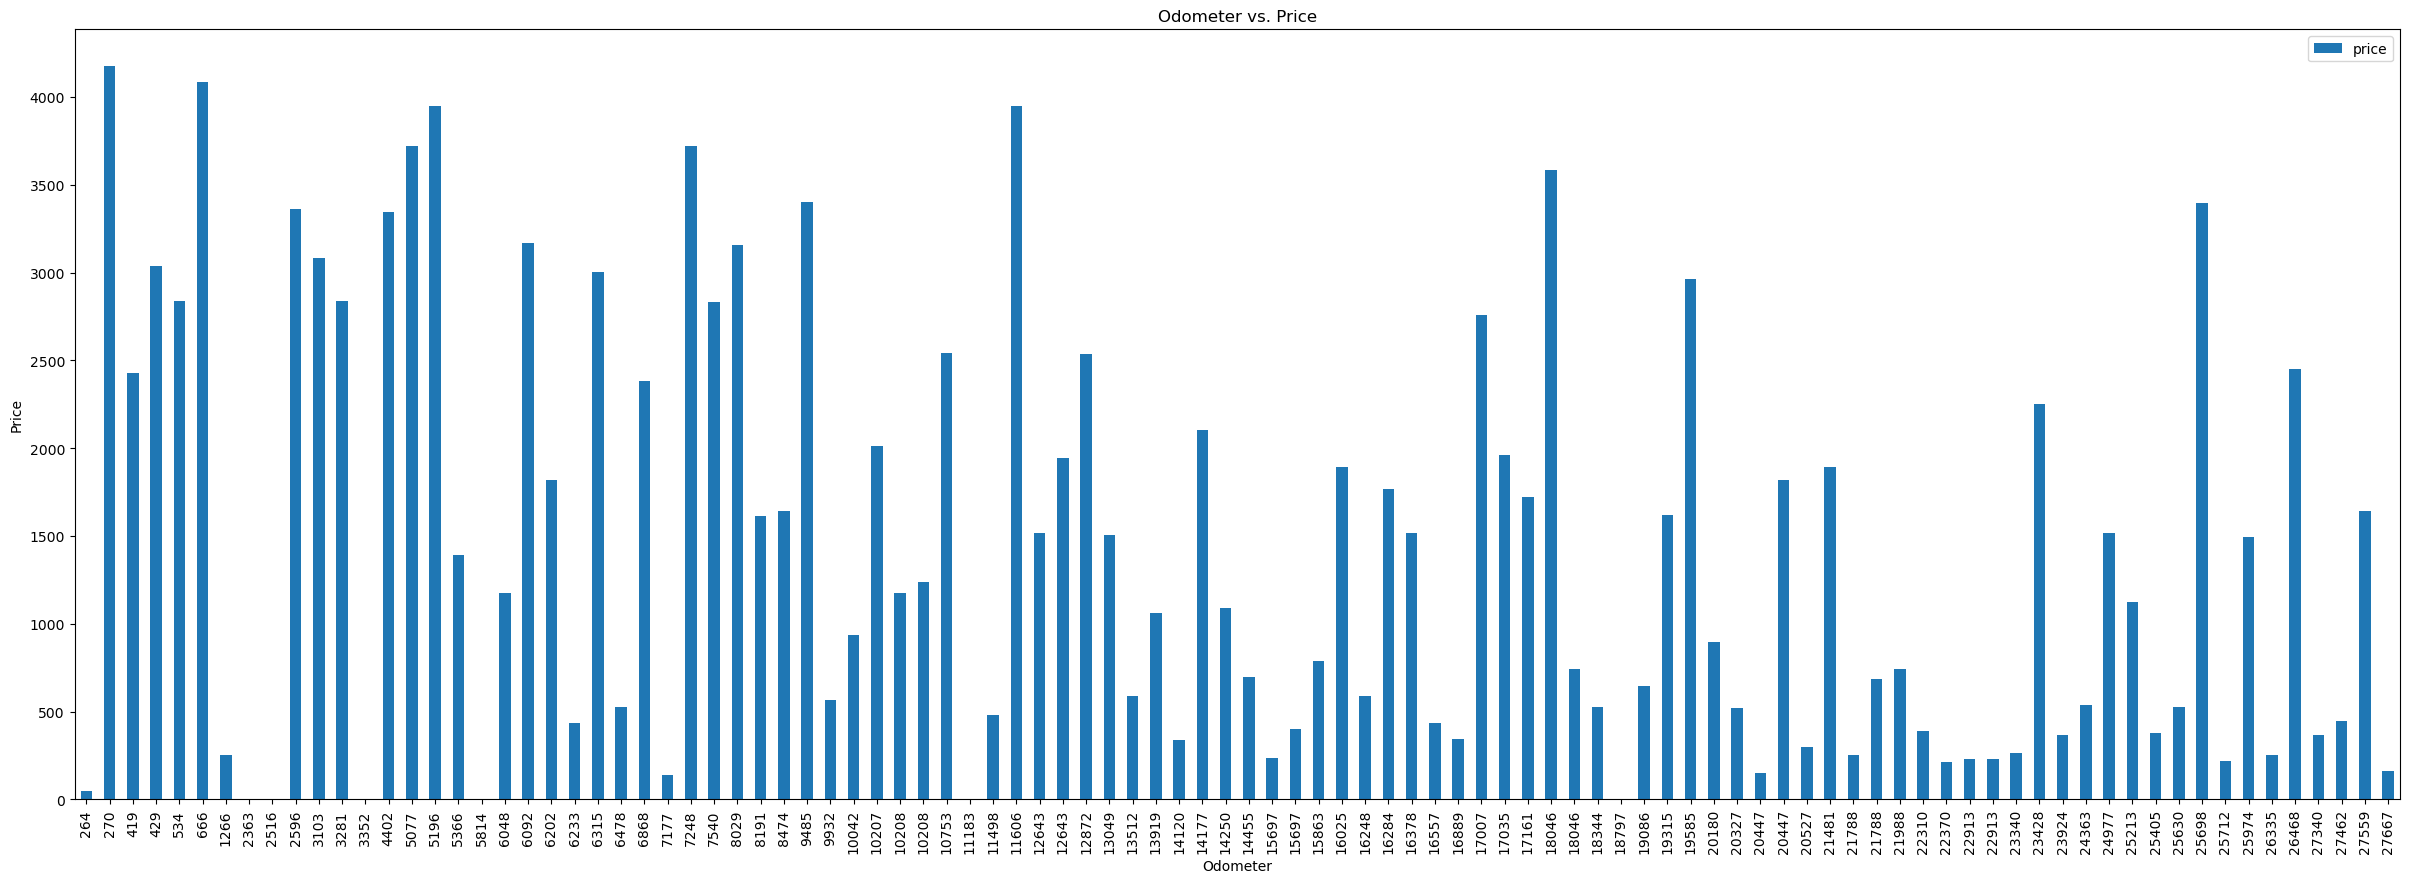

In [161]:
samp_df_for_vis.sort_values(by='odometer').plot(kind='bar', x='odometer', y='price', figsize=(30, 10), title='Odometer vs. Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

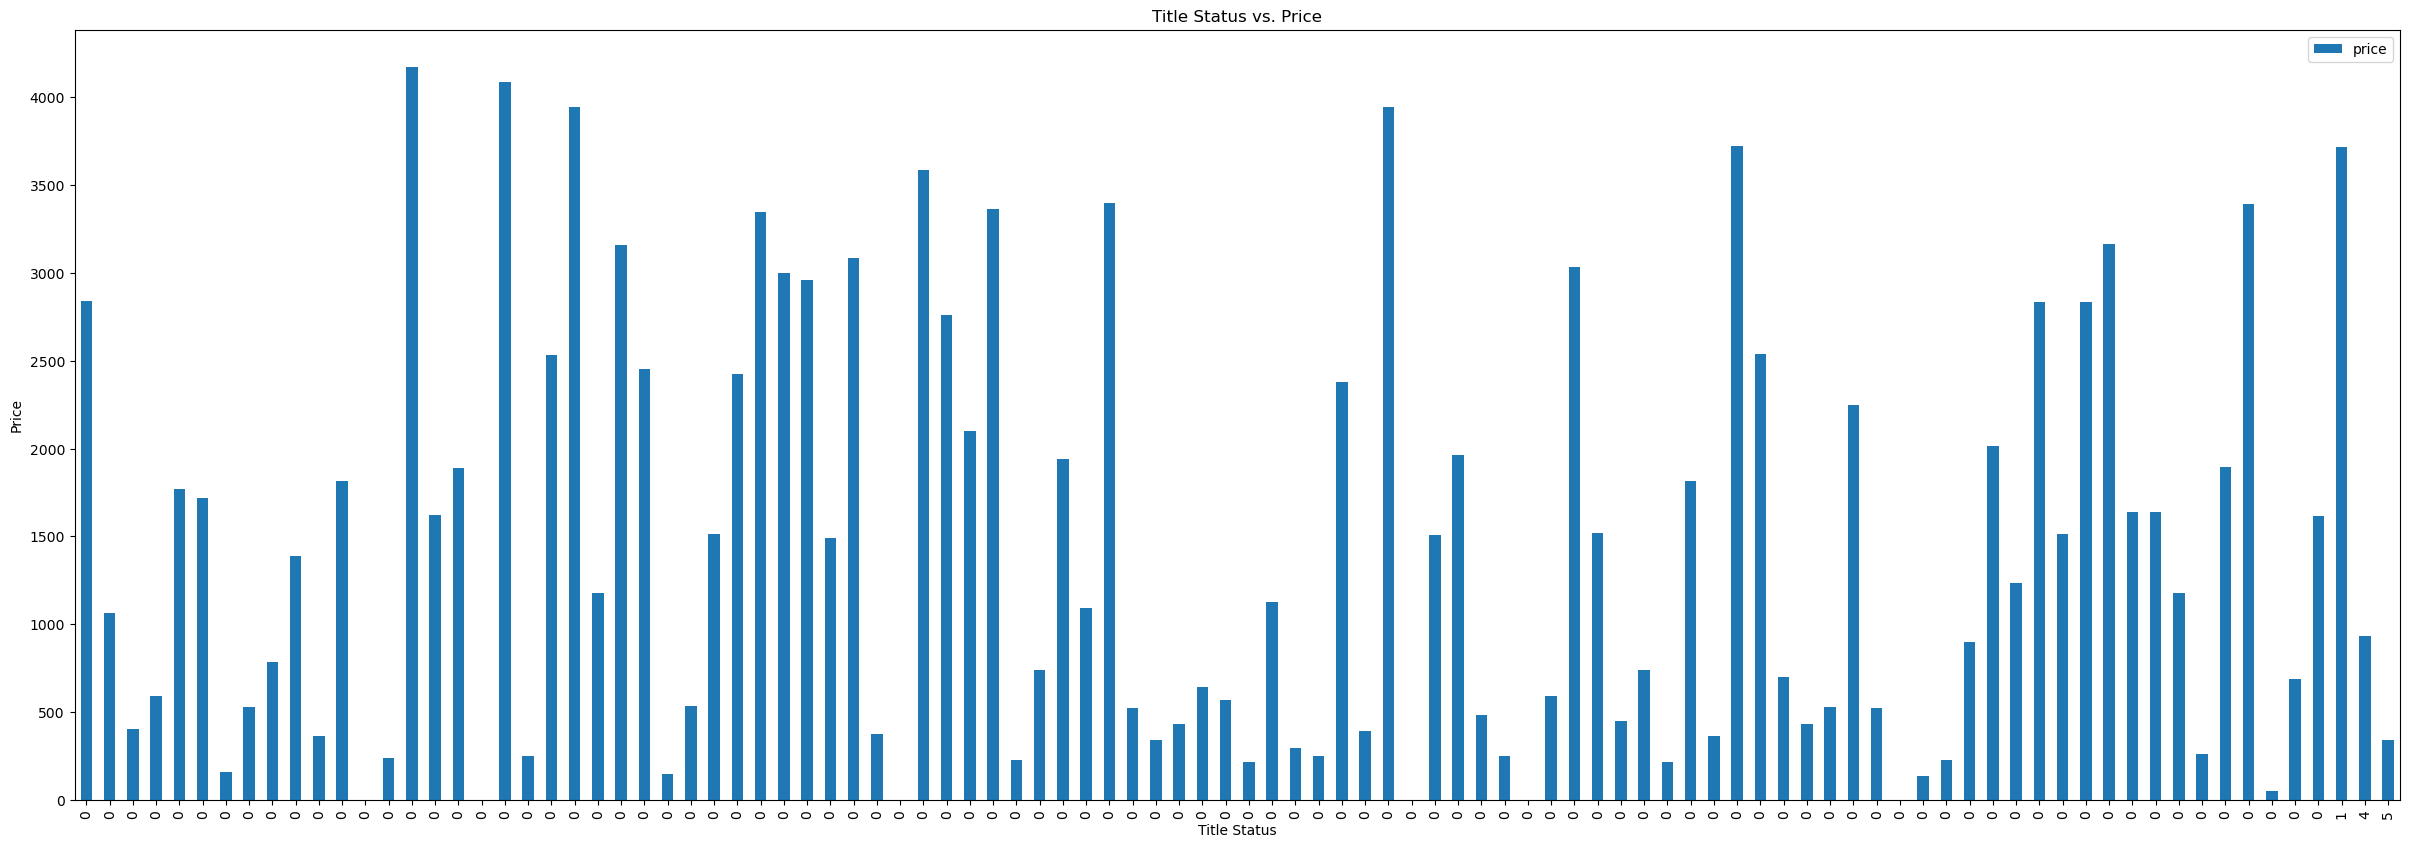

In [163]:
samp_df_for_vis.sort_values(by='title_status').plot(kind='bar', x='title_status', y='price', figsize=(30, 10), title='Title Status vs. Price')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.show()

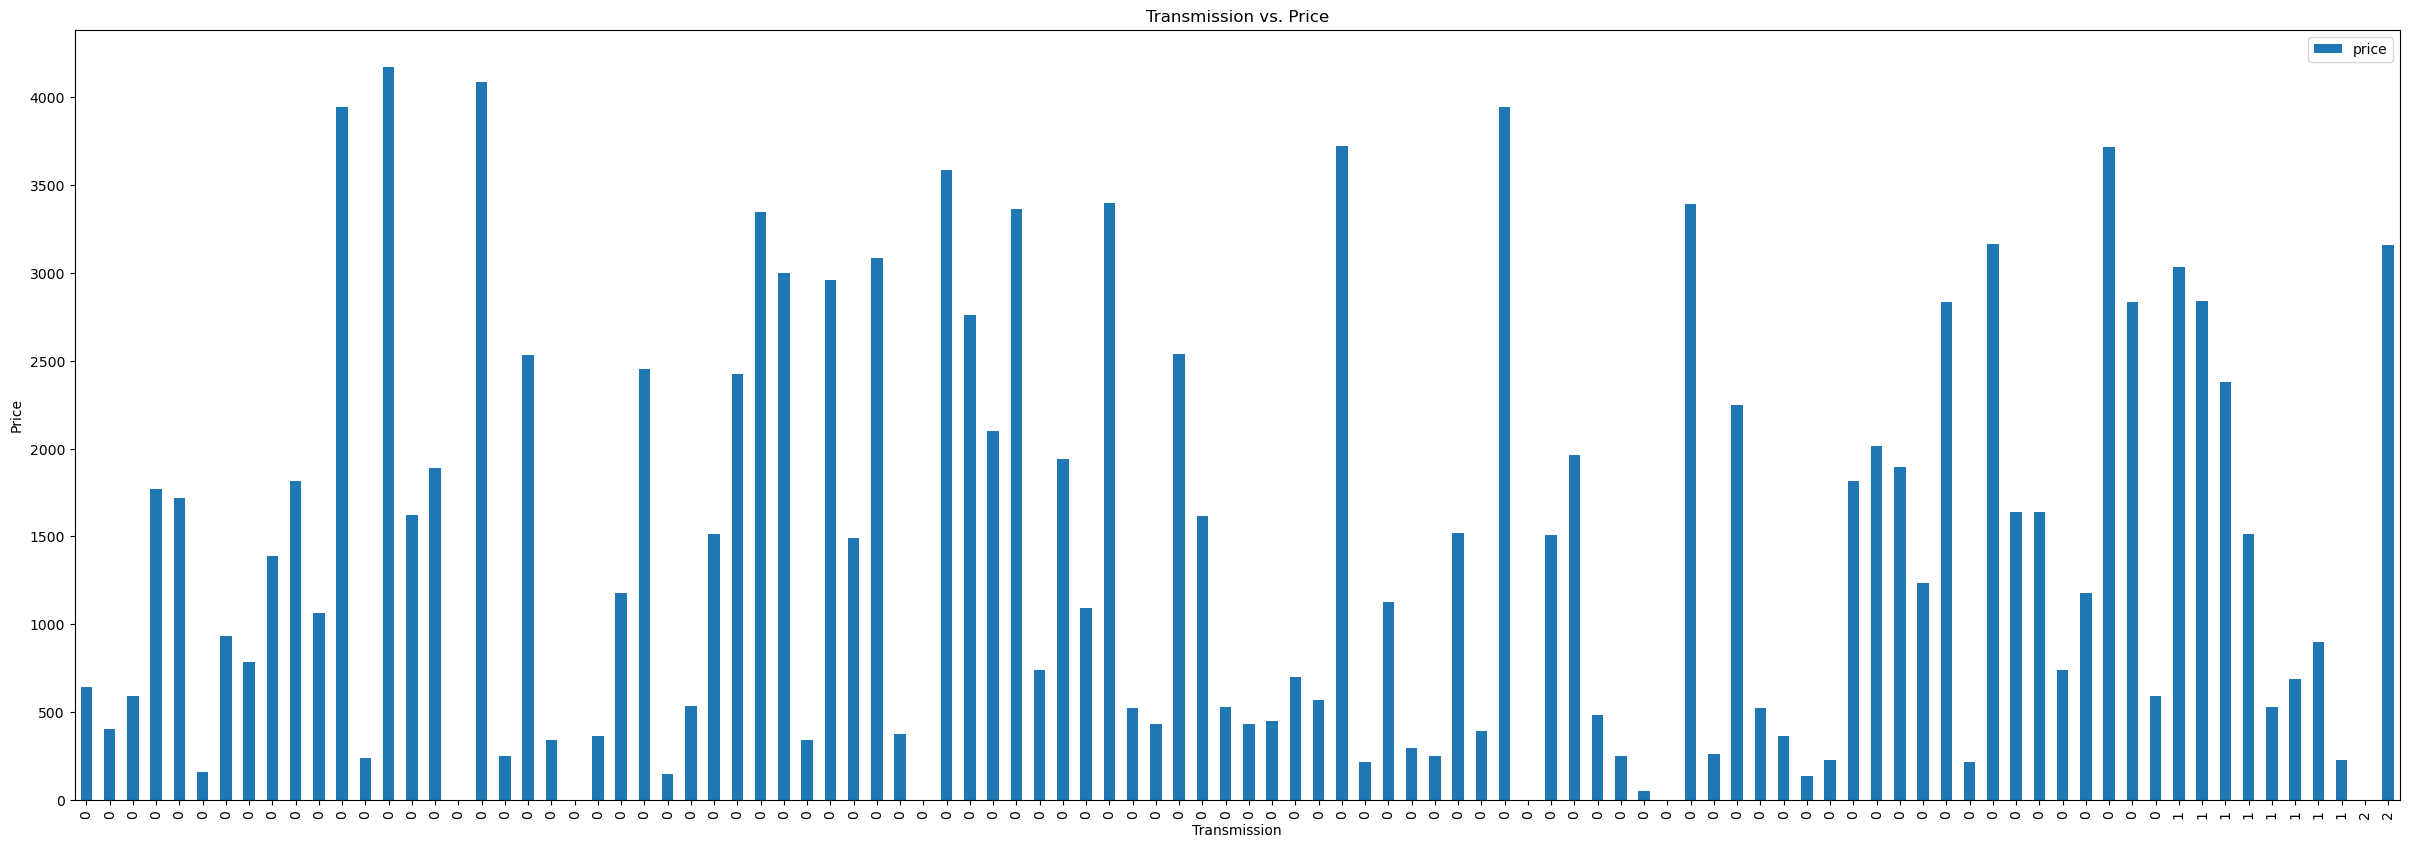

In [165]:
samp_df_for_vis.sort_values(by='transmission').plot(kind='bar', x='transmission', y='price', figsize=(30, 10), title='Transmission vs. Price')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

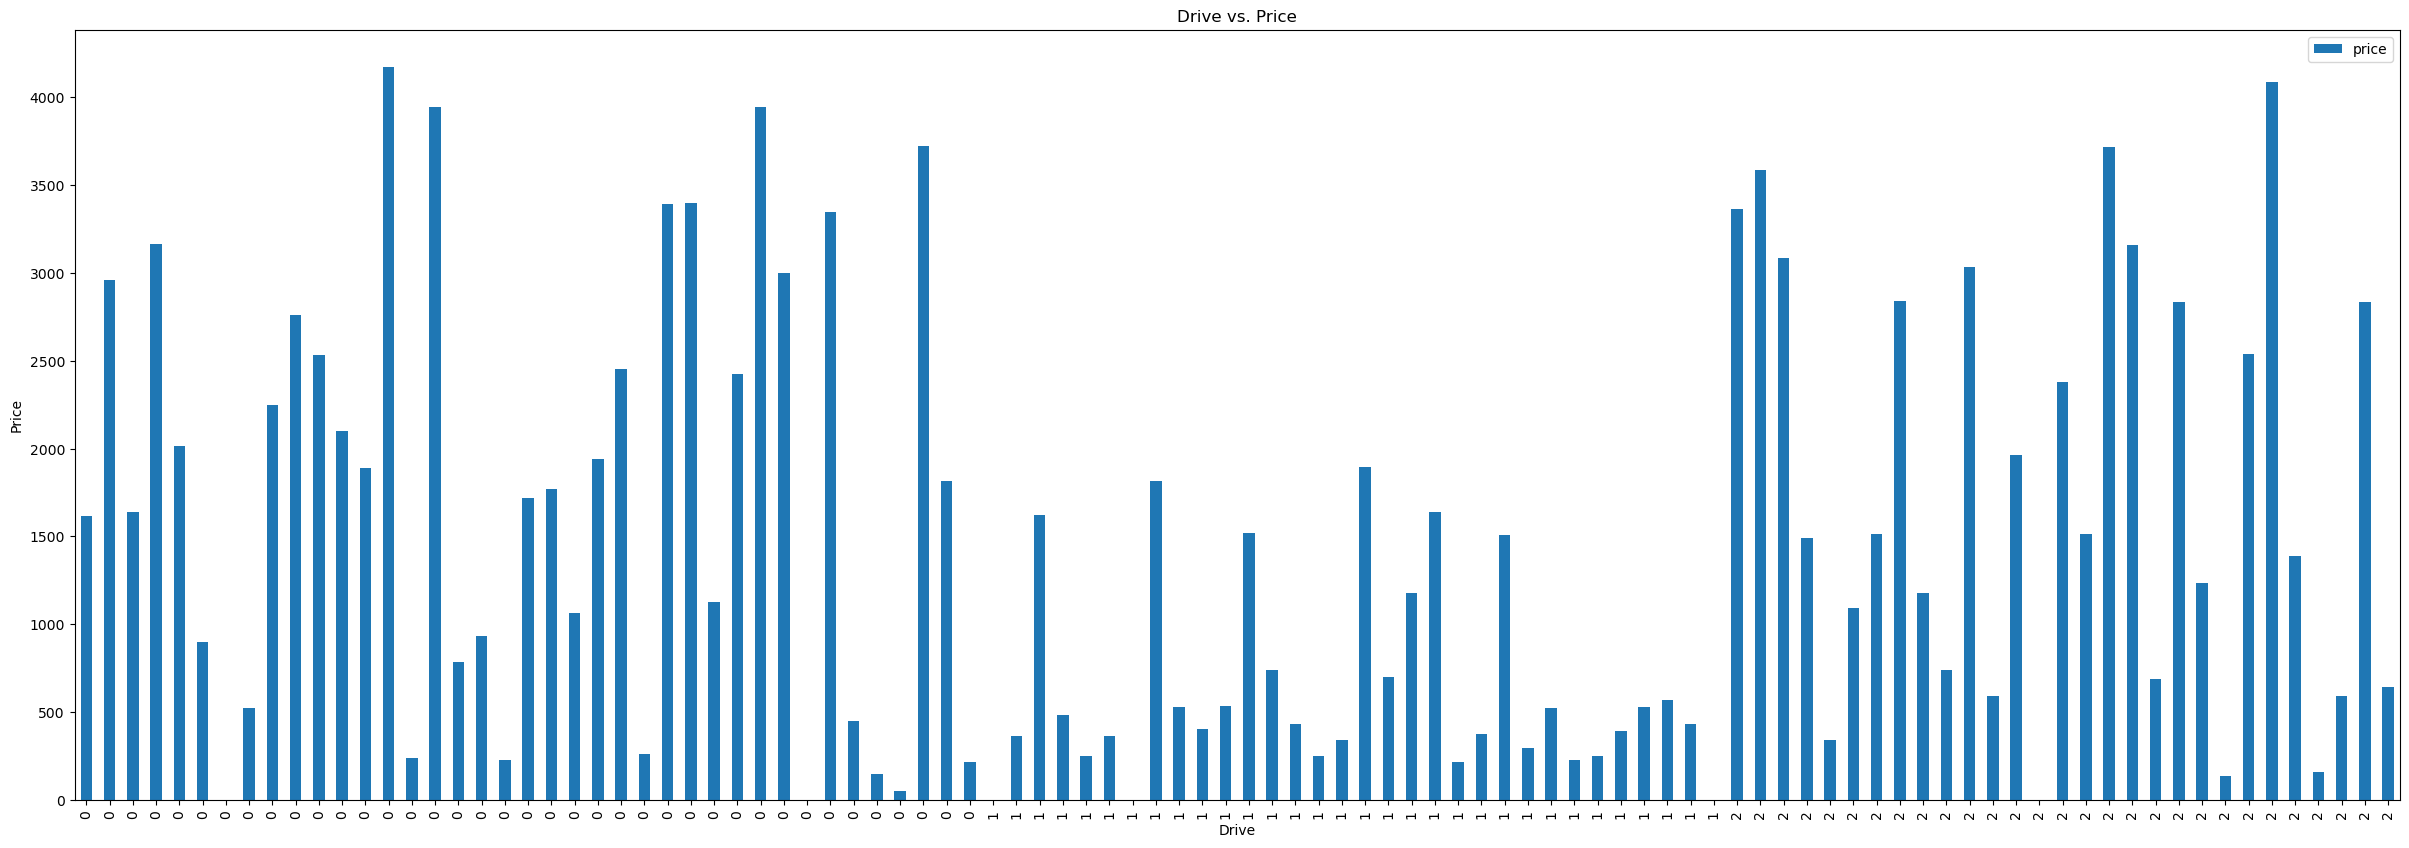

In [167]:
samp_df_for_vis.sort_values(by='drive').plot(kind='bar', x='drive', y='price', figsize=(30, 10), title='Drive vs. Price')
plt.xlabel('Drive')
plt.ylabel('Price')
plt.show()

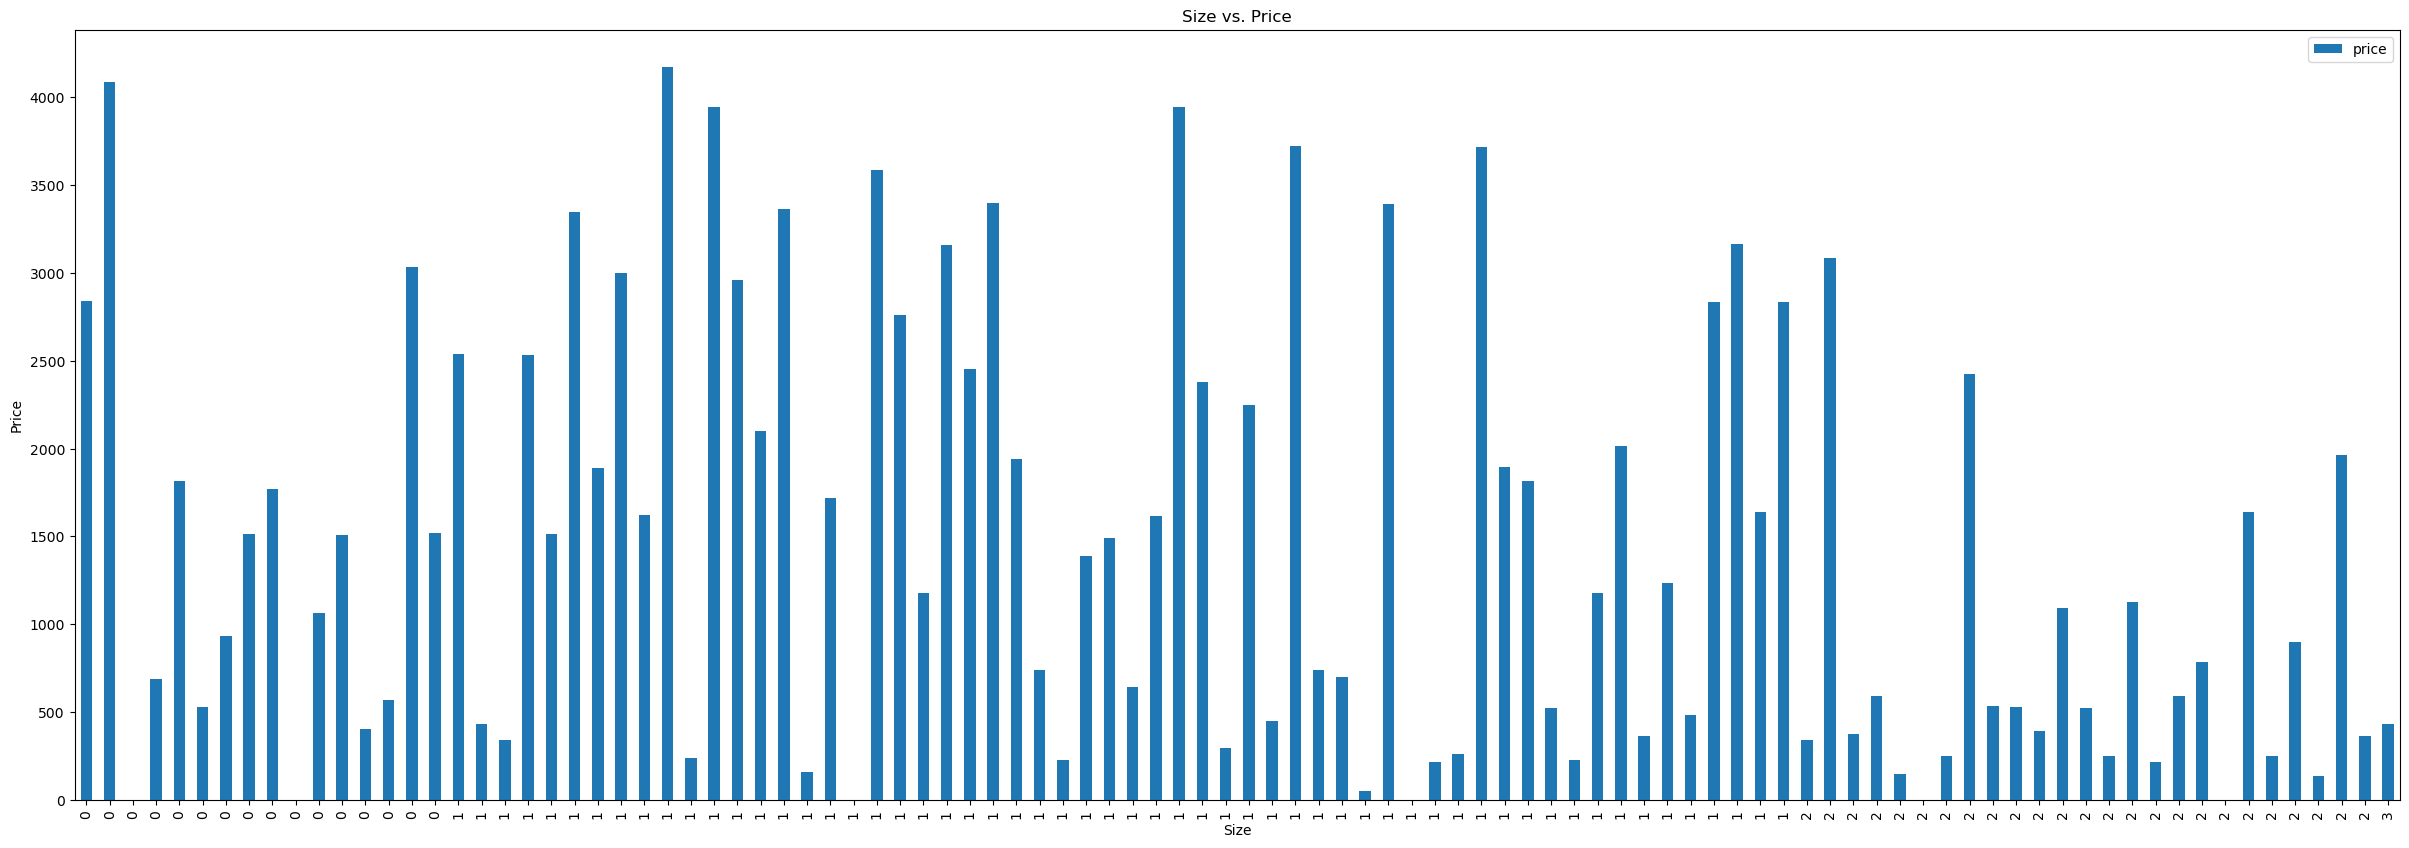

In [169]:
samp_df_for_vis.sort_values(by='size').plot(kind='bar', x='size', y='price', figsize=(30, 10), title='Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

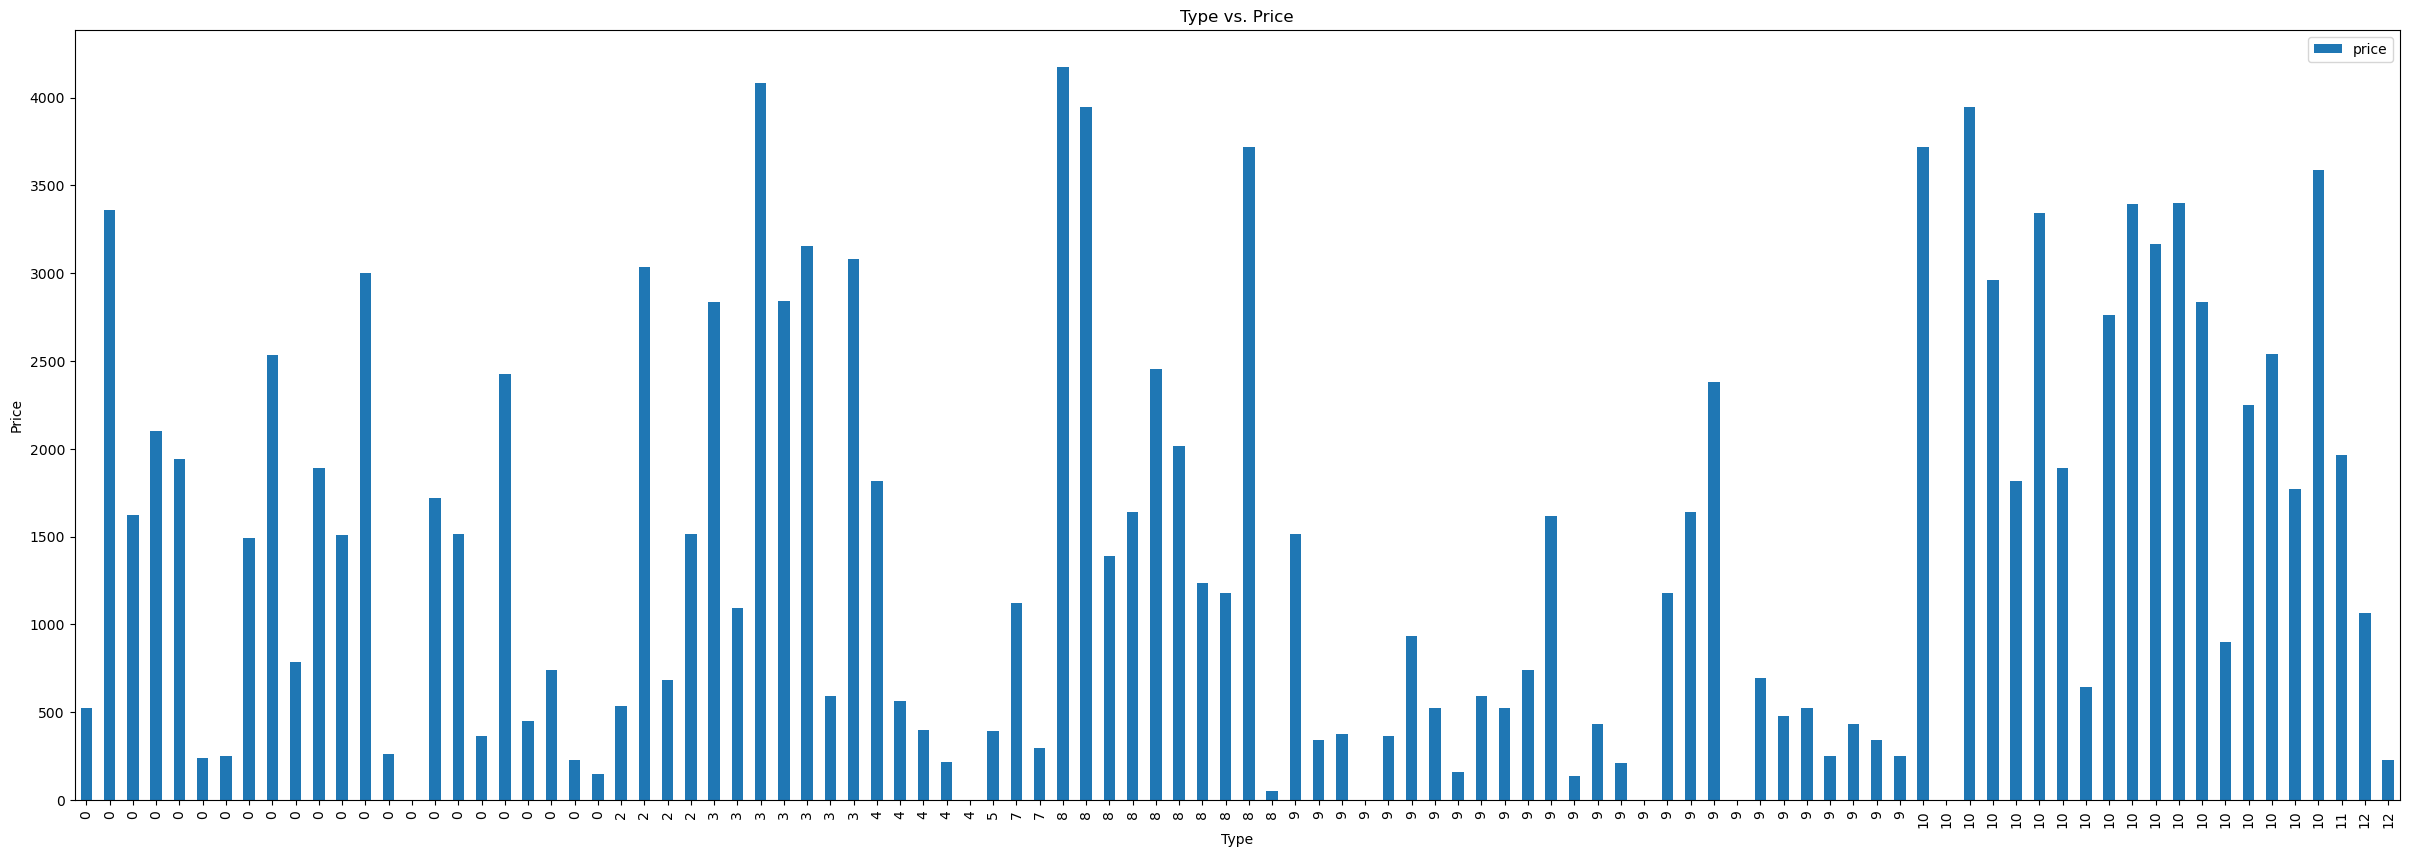

In [171]:
samp_df_for_vis.sort_values(by='type').plot(kind='bar', x='type', y='price', figsize=(30, 10), title='Type vs. Price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

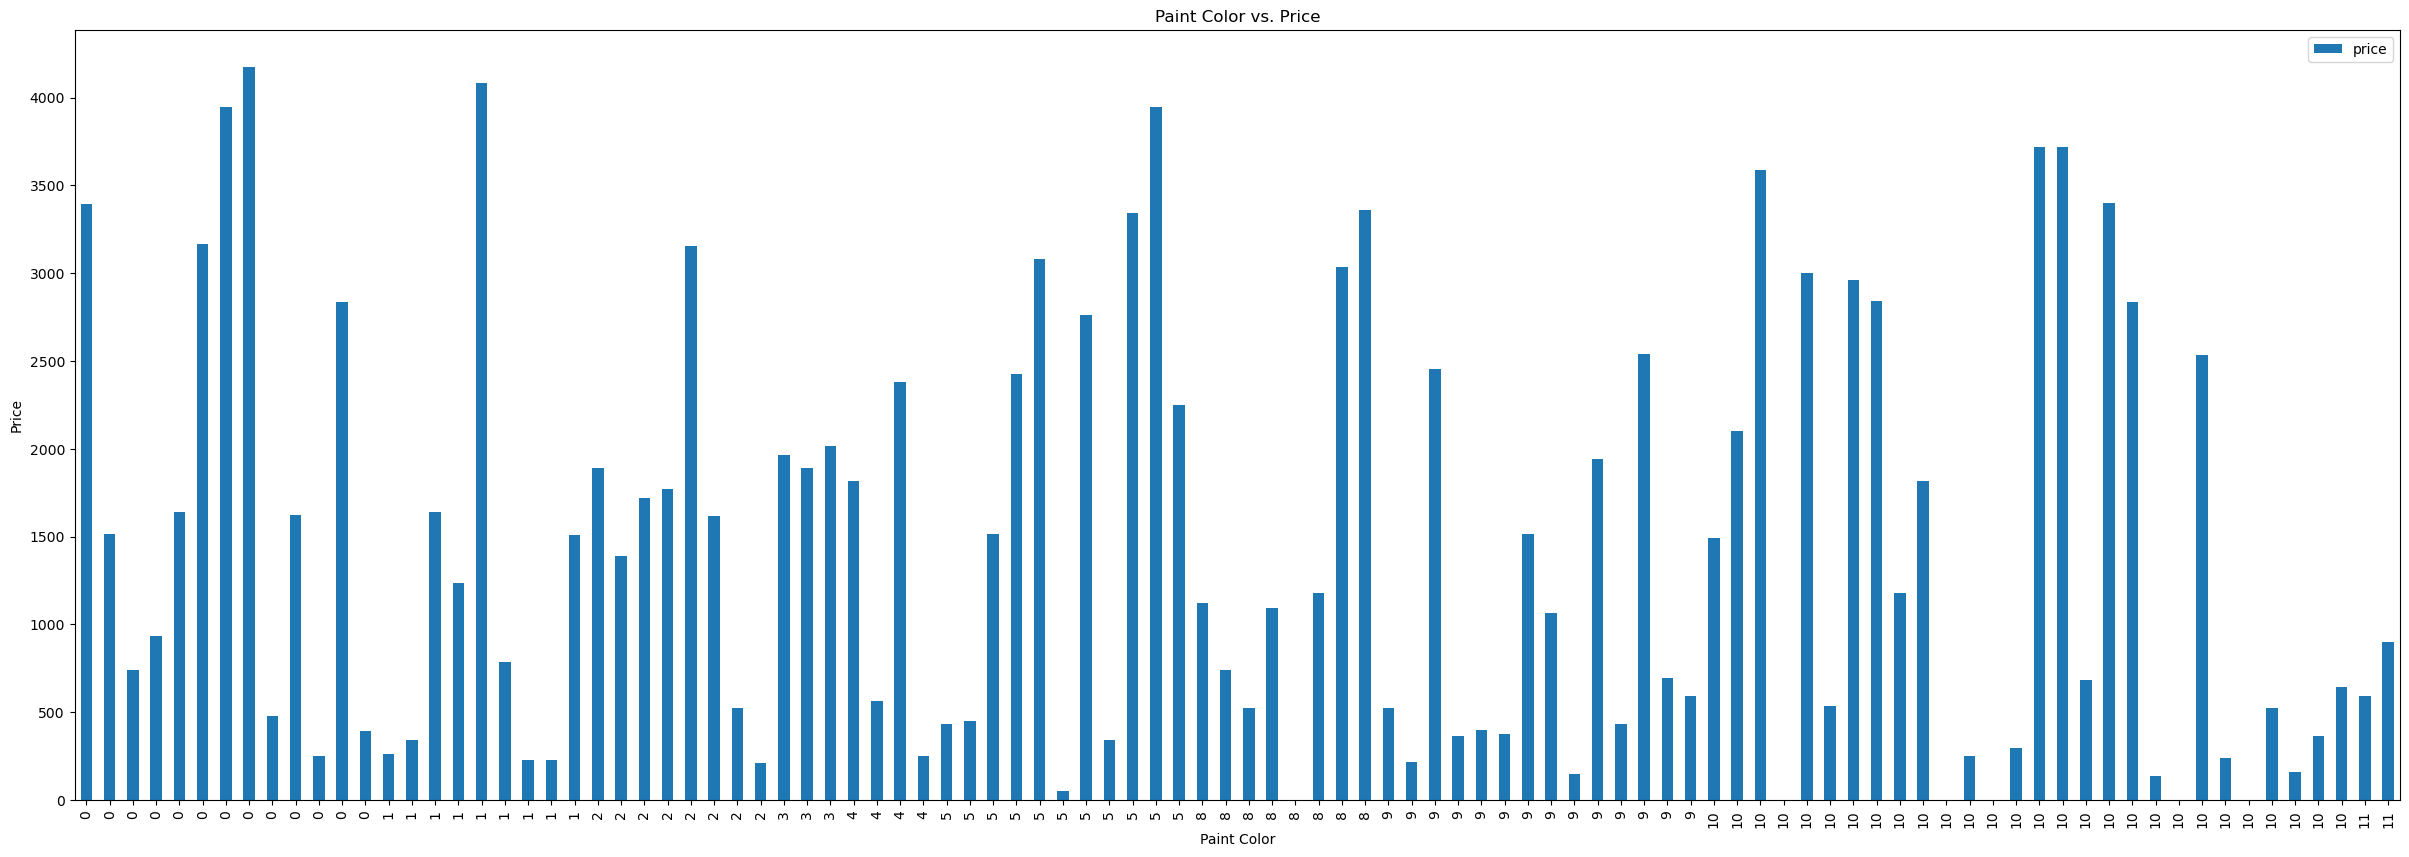

In [173]:
samp_df_for_vis.sort_values(by='paint_color').plot(kind='bar', x='paint_color', y='price', figsize=(30, 10), title='Paint Color vs. Price')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.show()

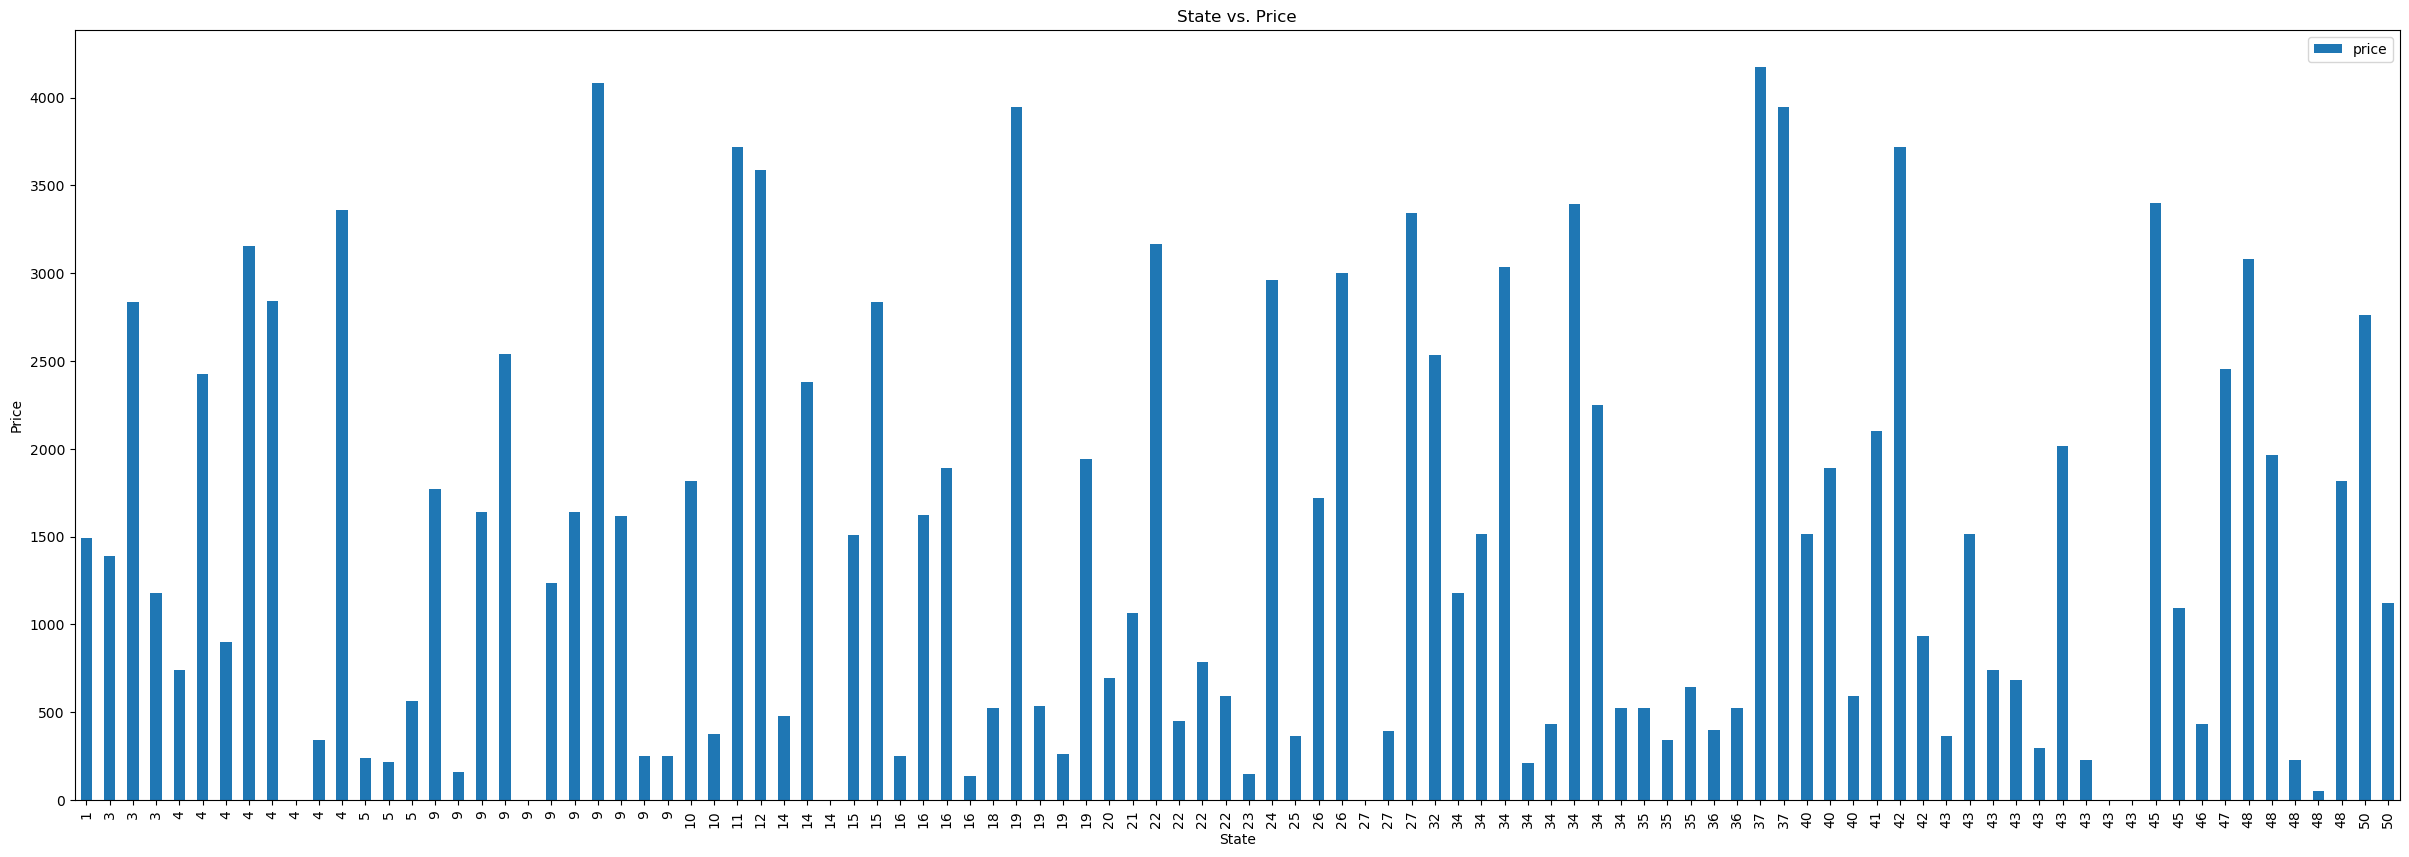

In [175]:
samp_df_for_vis.sort_values(by='state').plot(kind='bar', x='state', y='price', figsize=(30, 10), title='State vs. Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()

- Based on the visualization, it's hard to see much of a strong correlation between any of the features and the price.
- However, there are a couple features showing some correlation.
- These include odometer (lower odometer => higher price) and cylinders (higher cylinders => higher price).
- Again, just visualizing the sample charts here makes it very difficult to deduce any correlation. It will be interesting to run this data through some models to get further clarification.

# Model Data

- Set up train and test data
- Use LinearRegression model to fit train data
- Predict car prices based on test data
- Calculate mean squared error between prediction and actual prices
- Use PermutationImportance to find the importance of each feature

In [183]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_preds = linreg.predict(X_test)
test_mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {test_mse}')

r = permutation_importance(linreg, X, y,
                           n_repeats=30,
                           random_state=0)

perm_imp_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': r.importances_mean})
perm_imp_df

MSE: 715262.4732057749


,Feature,Permutation Importance
0,region,0.000232
1,year,0.069214
2,manufacturer,0.001082
3,model,0.001727
4,condition,0.000137
5,cylinders,0.144456
6,fuel,0.111348
7,odometer,0.425796
8,title_status,0.003763
9,transmission,0.000068


- From the LinearRegression model, we see that the odometer and cylinder features have the highest permutation importance as guessed from the visualizations above. Additionally, the fuel feature is next in importance.

- Using same train and test data, use SequentialFeatureSelector to select top 3 features

In [191]:
linreg_seq = LinearRegression()

seq_features = SequentialFeatureSelector(linreg_seq, n_features_to_select=3, direction='forward', scoring='neg_mean_squared_error', cv=5)
seq_features.fit(X_train, y_train)

sel_features = X_train.columns[seq_features.get_support()]

print("Selected Features:")
print(sel_features)

Selected Features:
Index(['cylinders', 'fuel', 'odometer'], dtype='object')


In [193]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
lin_reg.fit(X_train_selected, y_train)
y_pred = lin_reg.predict(X_test_selected)
mse_seq = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_seq}')

MSE: 783479.3080930505


- The 3 selected features match the features we got the highest imporantance from the previous model. This leads to higher confidence that they are the most important 3 features.
- When using the sequential feature selector and reducing the data to those 3 features, we see that the model provides a higher MSE. This makes sense as we are losing data from the previous model.